<a href="https://colab.research.google.com/github/pdomins/unsupervised-learning/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from textblob import TextBlob
from wordcloud import WordCloud


In [2]:
df = pd.read_csv("./data/movie_data.csv", delimiter=';', encoding='utf-8')
df

budget     genres    imdb_id        original_title  \
0     30000000.0  Animation  tt0114709             Toy Story   
1     65000000.0  Adventure  tt0113497               Jumanji   
2     16000000.0     Comedy  tt0114885     Waiting to Exhale   
3     60000000.0     Action  tt0113277                  Heat   
4     35000000.0     Action  tt0114576          Sudden Death   
...          ...        ...        ...                   ...   
5500  40000000.0      Crime  tt0117913        A Time to Kill   
5501  25000000.0     Action  tt0116320                  Fled   
5502  13000000.0    Fantasy  tt0116707       Joe's Apartment   
5503  26000000.0     Comedy  tt0116313  The First Wives Club   
5504  80000000.0     Action  tt0117438                Ransom   

                                               overview  popularity  \
0     Led by Woody, Andy's toys live happily in his ...   21.946943   
1     When siblings Judy and Peter discover an encha...   17.015539   
2     Cheated on, mistreated and stepped on, the wom...    3.859495   
3     Obsessive master thief, Neil McCauley leads a ...   17.924927   
4     International action superstar Jean Claude Van...    5.231580   
...                                                 ...         ...   
5500  A young lawyer defends a black man accused of ...   13.309013   
5501  During a routine prison work detail, convict P...    3.906949   
5502  A nice guy has just moved to New York and disc...    9.490858   
5503  After years of helping their hubbies climb the...         NaN   
5504  When a rich man's son is kidnapped, he coopera...    8.772188   

      production_companies  production_countries release_date      revenue  \
0                      1.0                   1.0   1995-10-30  373554033.0   
1                      3.0                   1.0   1995-12-15  262797249.0   
2                      1.0                   1.0   1995-12-22   81452156.0   
3                      3.0                   1.0   1995-12-15  187436818.0   
4                      3.0                   1.0   1995-12-22   64350171.0   
...                    ...                   ...          ...          ...   
5500                   2.0                   1.0   1996-07-24  152266007.0   
5501                   1.0                   1.0   1996-07-19   17193231.0   
5502                   0.0                   1.0   1996-07-26    4619014.0   
5503                   1.0                   1.0   1996-09-20  116400000.0   
5504                   2.0                   1.0   1996-11-08  309492681.0   

      runtime  spoken_languages  vote_average  vote_count  
0        81.0               1.0           7.7      5415.0  
1       104.0               2.0           6.9      2413.0  
2       127.0               1.0           6.1        34.0  
3       170.0               2.0           7.7      1886.0  
4       106.0               1.0           5.5       174.0  
...       ...               ...           ...         ...  
5500    149.0               1.0           7.0       522.0  
5501      NaN               1.0           5.2        49.0  
5502     78.0               1.0           5.0        87.0  
5503    102.0               1.0           6.5       172.0  
5504    117.0               1.0           6.4       482.0  

[5505 rows x 14 columns]

# Actions taken based on Post-Analysis
- Remove all movies from 2017 (its incomplete)
- Drop TV Movies Genre (its got only one movie)

In [3]:
df = df[df['genres'] != 'TV Movie']

df['release_date'] = pd.to_datetime(df['release_date'])
df = df[df['release_date'].dt.year != 2017]

/tmp/ipykernel_22388/908691573.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_date'] = pd.to_datetime(df['release_date'])


# Repeated IMDB-id analysis

In [4]:
duplicated_values = df[df['imdb_id'].notnull()]['imdb_id'].duplicated()
duplicate_count = duplicated_values.sum()
print("Number of repeated non-null values in 'imdb_id':", duplicate_count)

Number of repeated non-null values in 'imdb_id': 265


### Keep only the non-repeated values

In [5]:
df = df[df['imdb_id'].isnull() | ~df['imdb_id'].duplicated(keep='first')]

# Null-analysis

In [6]:
attrs = df.columns

for col in attrs:
    num_missing = df[col].isna().sum()
    print(f'missing {col}\'s: {num_missing}')

missing budget's: 38
missing genres's: 36
missing imdb_id's: 45
missing original_title's: 34
missing overview's: 41
missing popularity's: 37
missing production_companies's: 27
missing production_countries's: 25
missing release_date's: 31
missing revenue's: 30
missing runtime's: 32
missing spoken_languages's: 43
missing vote_average's: 40
missing vote_count's: 36


In [7]:
total_rows = df.shape[0]
print(f'Total number of rows: {total_rows}')

non_null_rows = df.dropna().shape[0]
df = df.dropna()
print(f'Number of rows after removing rows with null values: {non_null_rows}')

dropped_rows = total_rows - non_null_rows
print(f'Number of rows dropped: {dropped_rows}')

Total number of rows: 5179
Number of rows after removing rows with null values: 4685
Number of rows dropped: 494


In [8]:
out_df = df.copy()

# Seaborn Palette

In [9]:
genre_colors = sns.cubehelix_palette(rot=.2, gamma=.5, n_colors=len(df['genres'].unique()))

companies_colors = sns.cubehelix_palette(rot=.2, gamma=.5, n_colors=len(df['production_companies'].unique()))
languages_colors = sns.cubehelix_palette(rot=.2, gamma=.5, n_colors=len(df['spoken_languages'].unique()))

three_colors = sns.cubehelix_palette(rot=.2, gamma=.5, n_colors=3)
palette = sns.cubehelix_palette(rot=.2, gamma=.5)
first_color = sns.cubehelix_palette(rot=.2, gamma=.5, n_colors=1)[0]
middle_color = sns.cubehelix_palette(rot=.2, gamma=.5, n_colors=5)[1]
final_color = sns.cubehelix_palette(rot=.2, gamma=.5, n_colors=2)[1]

# Budget

## Histogram

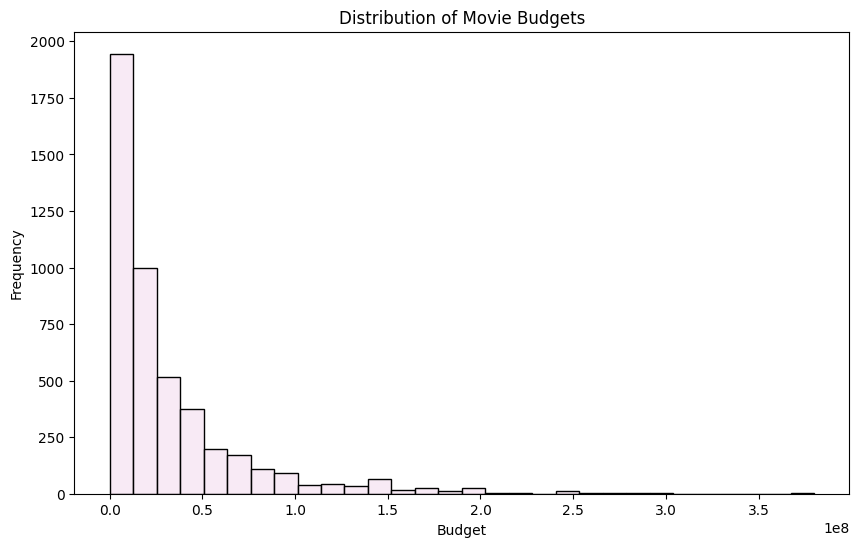

In [10]:
budget_data = df['budget']


plt.figure(figsize=(10,6))
sns.histplot(budget_data, kde=False, bins=30, color=first_color)
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()

## Boxplot on Genres

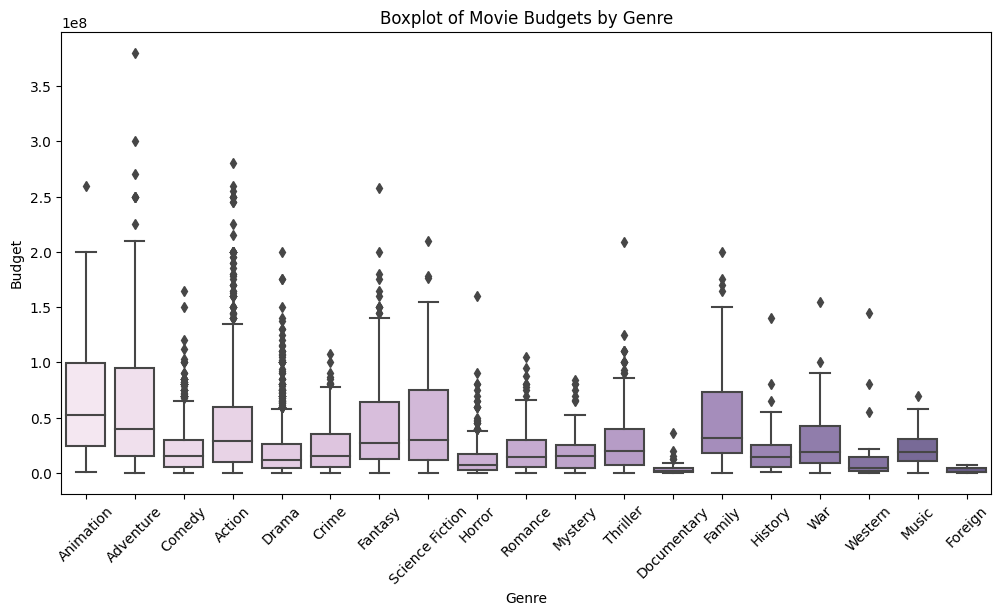

In [11]:
plt.figure(figsize=(12,6))

sns.boxplot(x='genres', y='budget', data=df, palette=genre_colors)

plt.title('Boxplot of Movie Budgets by Genre')
plt.xlabel('Genre')
plt.ylabel('Budget')
plt.xticks(rotation=45)
plt.show()

# Genres

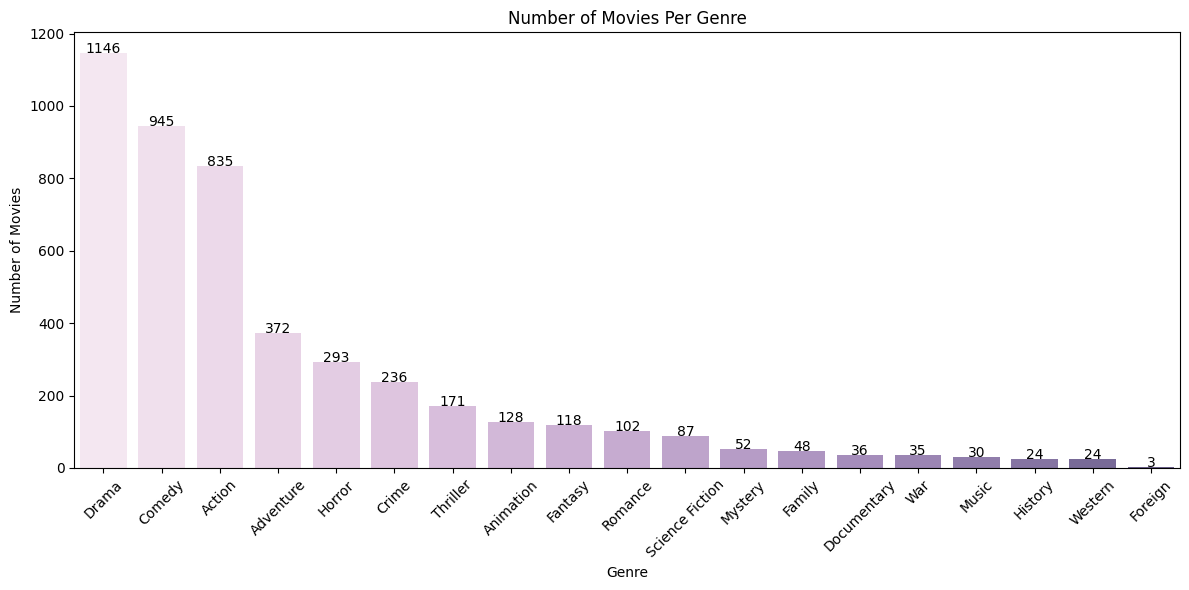

In [12]:
df_non_null_genre = df.dropna(subset=['genres']).copy()

genre_counts = df_non_null_genre['genres'].value_counts()

plt.figure(figsize=(12,6))
ax = sns.barplot(x=genre_counts.index, y=genre_counts.values, palette=genre_colors)

plt.title('Number of Movies Per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

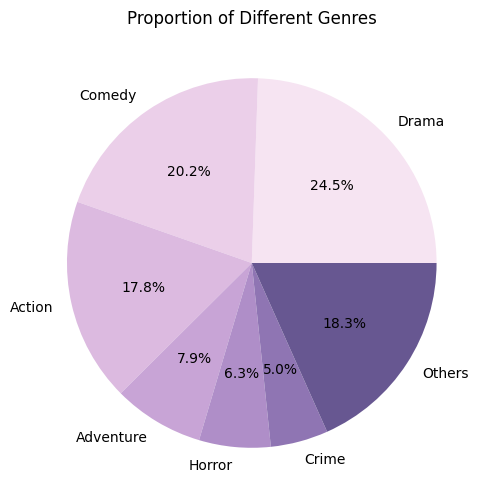

In [13]:
genre_counts = df['genres'].value_counts()
threshold = 5 # 5%

total_count = sum(genre_counts)
percentages = genre_counts / total_count * 100

small_categories = percentages[percentages < threshold]
others_sum = sum(small_categories)

percentages = percentages[percentages >= threshold]
percentages.loc['Others'] = others_sum

chart_colors = sns.cubehelix_palette(rot=.2, gamma=.5, n_colors=len(percentages.index))


plt.figure(figsize=(10, 6))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', colors = chart_colors)
plt.title('Proportion of Different Genres')
plt.show()

# Overviews

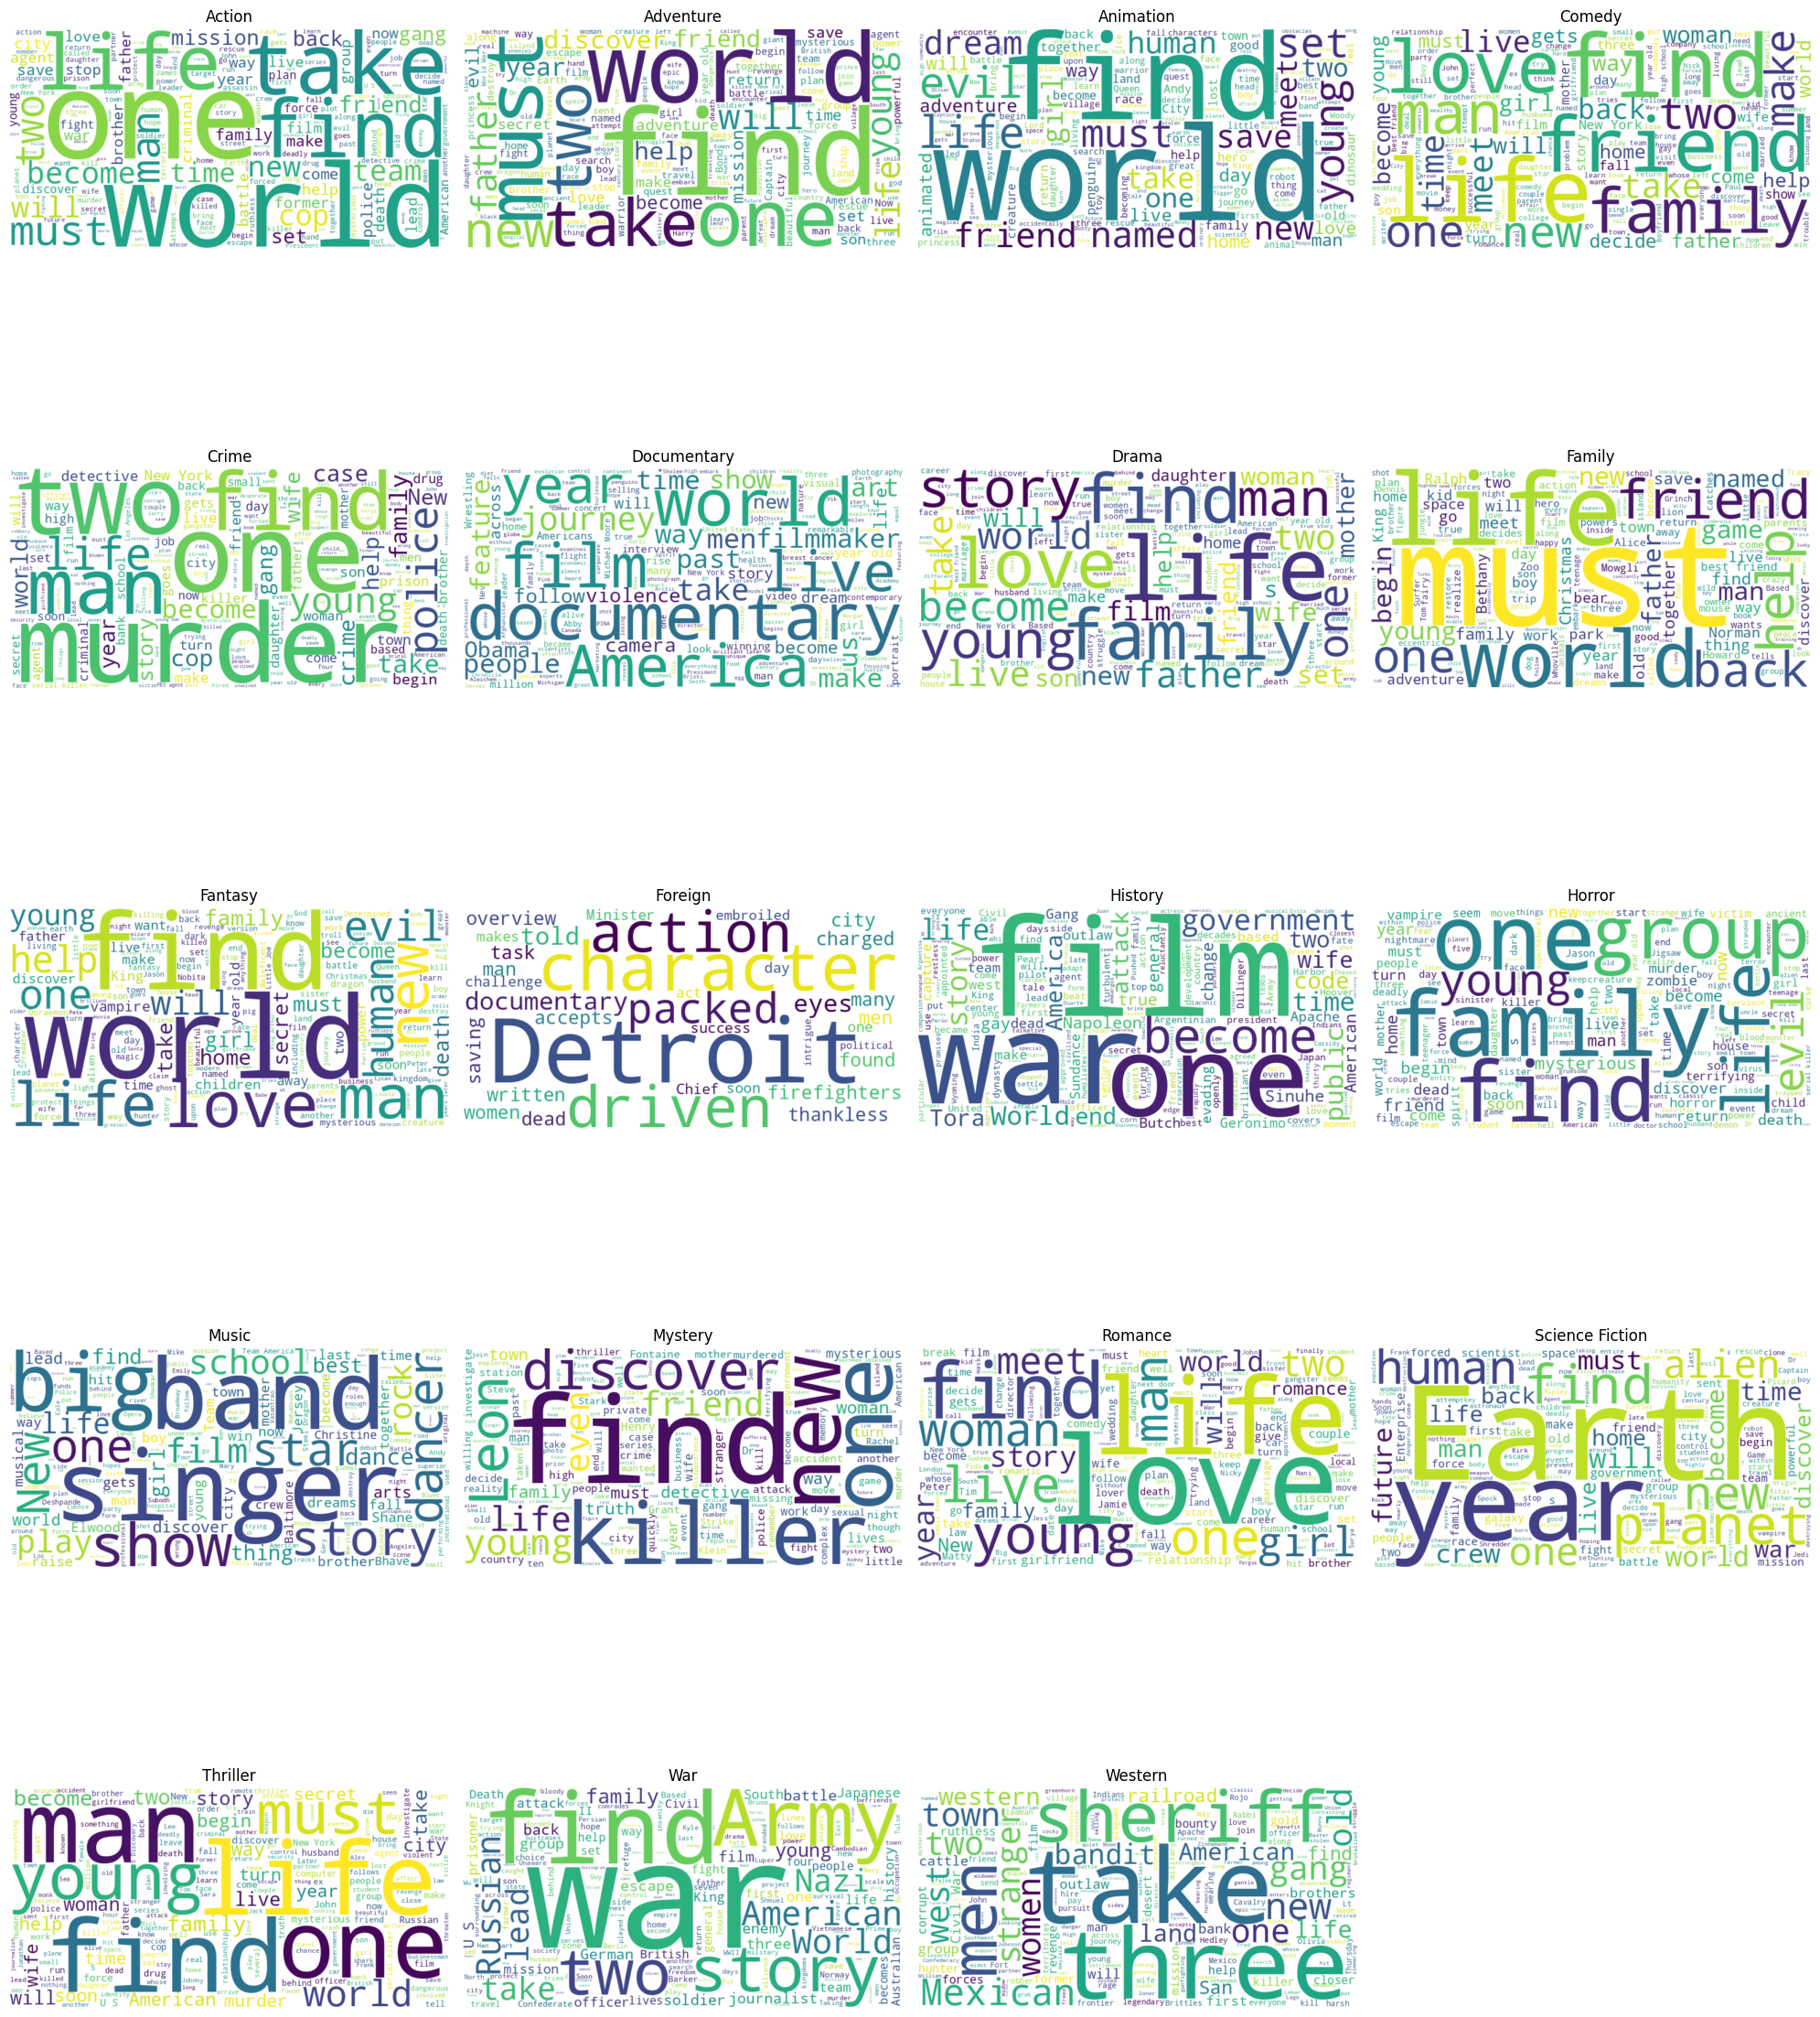

In [14]:
grouped_overviews = df.groupby('genres')['overview'].apply(' '.join)

num_genres = len(grouped_overviews)
cols = 4
rows = math.ceil(num_genres / cols)

plt.figure(figsize=(20, 5 * rows))

for idx, (genre, overview_text) in enumerate(grouped_overviews.items(), 1):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(overview_text)
    plt.subplot(rows, cols, idx)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(genre)
    plt.axis('off')

plt.tight_layout()
plt.show()

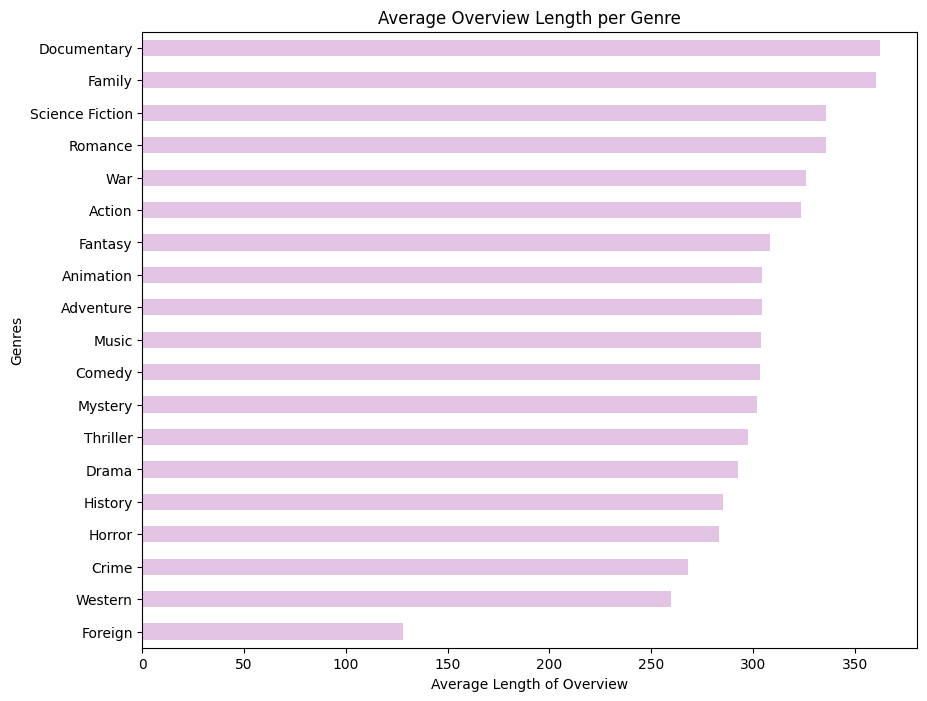

In [15]:
df_copy = df.copy()

df_copy['overview_length'] = df_copy['overview'].apply(lambda x: len(str(x)))
out_df['overview_length'] = df_copy['overview_length']

average_overview_length = df_copy.groupby('genres')['overview_length'].mean()

average_overview_length.sort_values().plot(kind='barh', figsize=(10, 8), color=middle_color)

plt.title('Average Overview Length per Genre')
plt.xlabel('Average Length of Overview')
plt.ylabel('Genres')
plt.show()

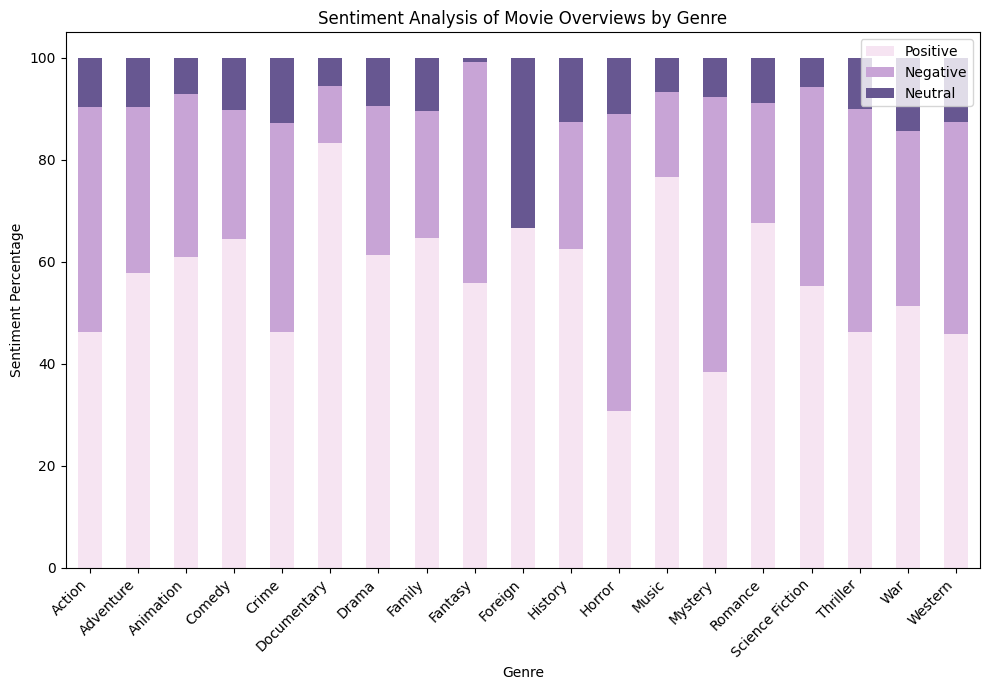

In [16]:
df_processed = df.copy()

def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df_processed.loc[:, 'sentiment'] = df_processed['overview'].apply(analyze_sentiment)
df_processed.loc[:, 'sentiment_category'] = df_processed['sentiment'].apply(categorize_sentiment)
out_df['sentiment'] = df_processed['sentiment']

sentiment_by_genre = df_processed.groupby('genres')['sentiment_category'].value_counts().unstack().fillna(0)
sentiment_by_genre['total'] = sentiment_by_genre.sum(axis=1)

sentiment_percentage = sentiment_by_genre.loc[:, ['Positive', 'Negative', 'Neutral']].div(sentiment_by_genre['total'], axis=0) * 100
sentiment_percentage.plot(kind='bar', stacked=True, figsize=(10, 7), color=three_colors)
plt.title('Sentiment Analysis of Movie Overviews by Genre')
plt.xlabel('Genre')
plt.ylabel('Sentiment Percentage')
plt.legend(['Positive', 'Negative', 'Neutral'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Popularity

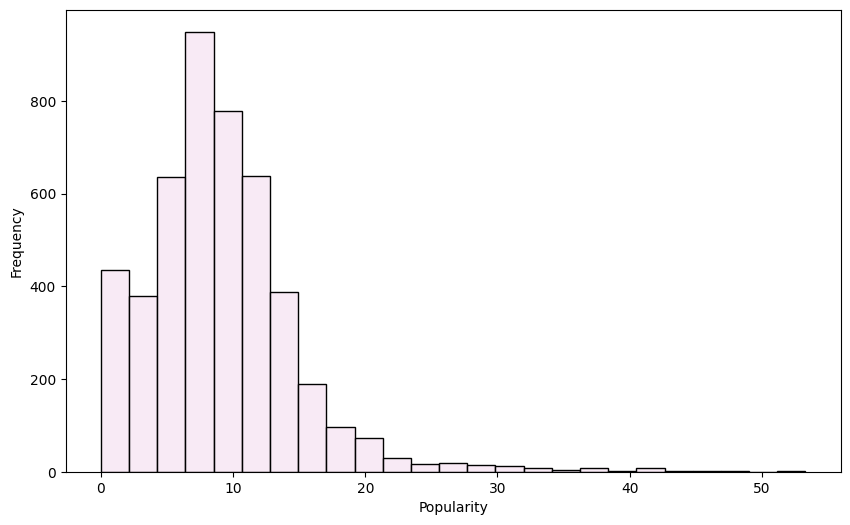

In [17]:
popularity_data = df['popularity']

plt.figure(figsize=(10,6))
sns.histplot(popularity_data, kde=False, bins=25, color=first_color)
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

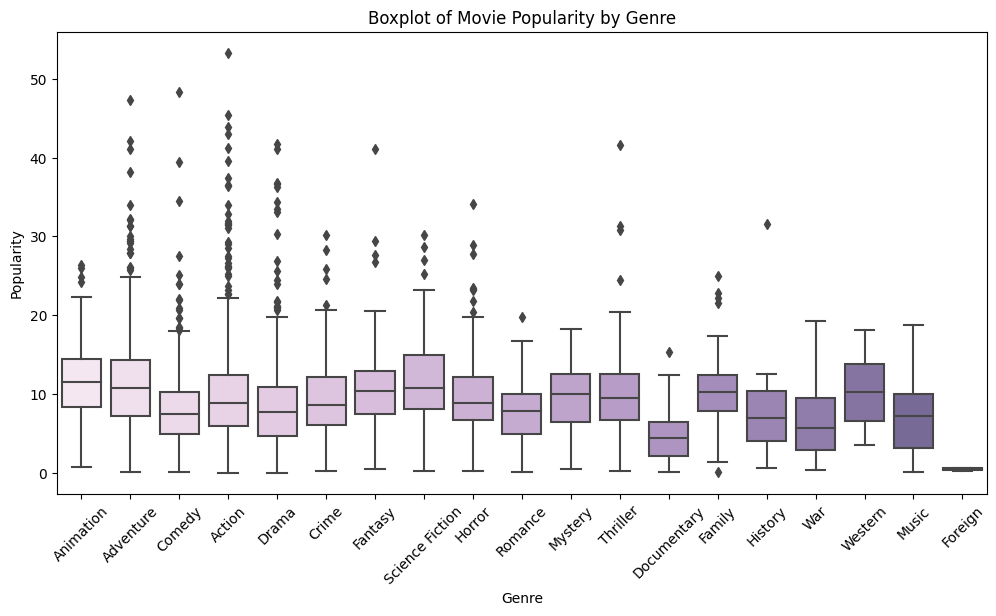

In [18]:
plt.figure(figsize=(12,6))

sns.boxplot(x='genres', y='popularity', data=df, palette=genre_colors)

plt.title('Boxplot of Movie Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.show()

# Production Companies

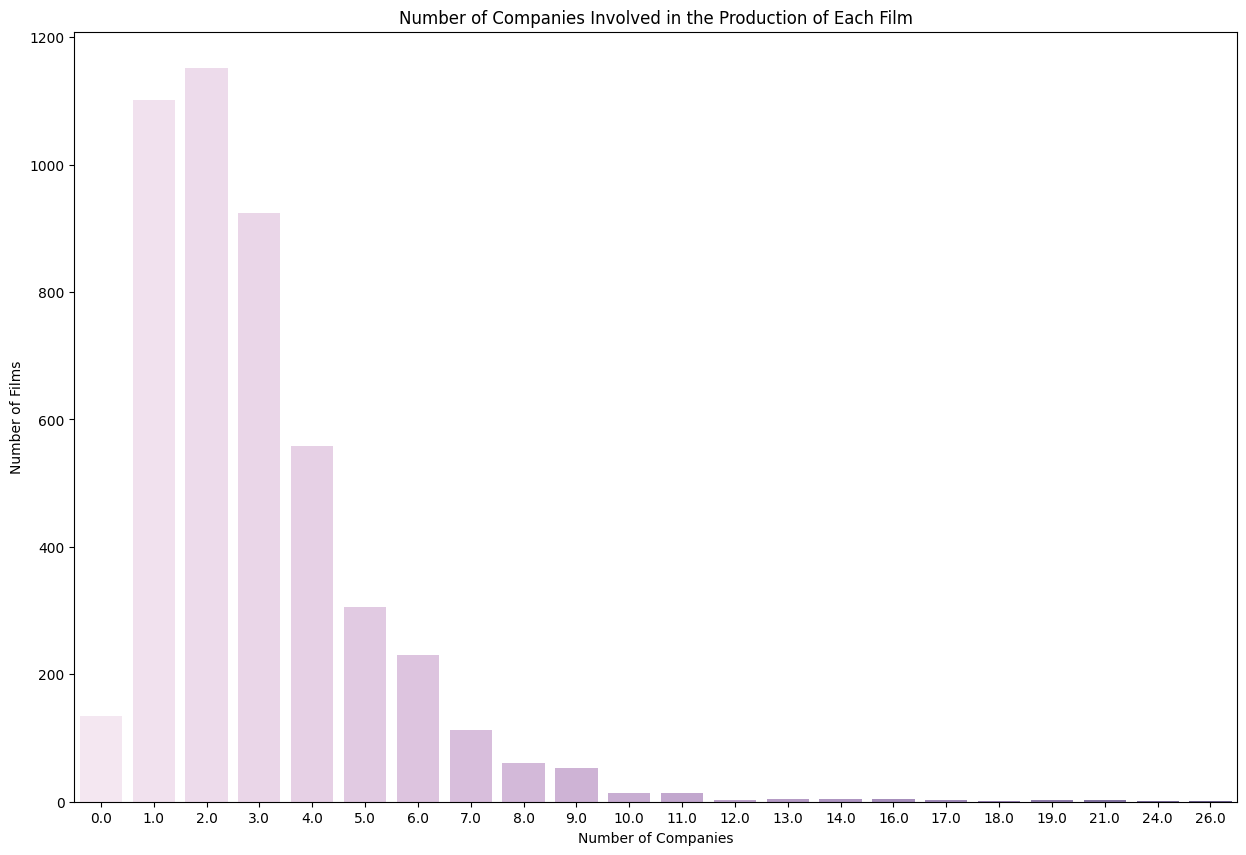

In [19]:
production_companies_counts = df['production_companies'].value_counts()

plt.figure(figsize=(15,10))
sns.barplot(x=production_companies_counts.index, y=production_companies_counts.values, palette=companies_colors)
plt.title('Number of Companies Involved in the Production of Each Film')
plt.xlabel('Number of Companies')
plt.ylabel('Number of Films')
plt.show()

# Production Countries

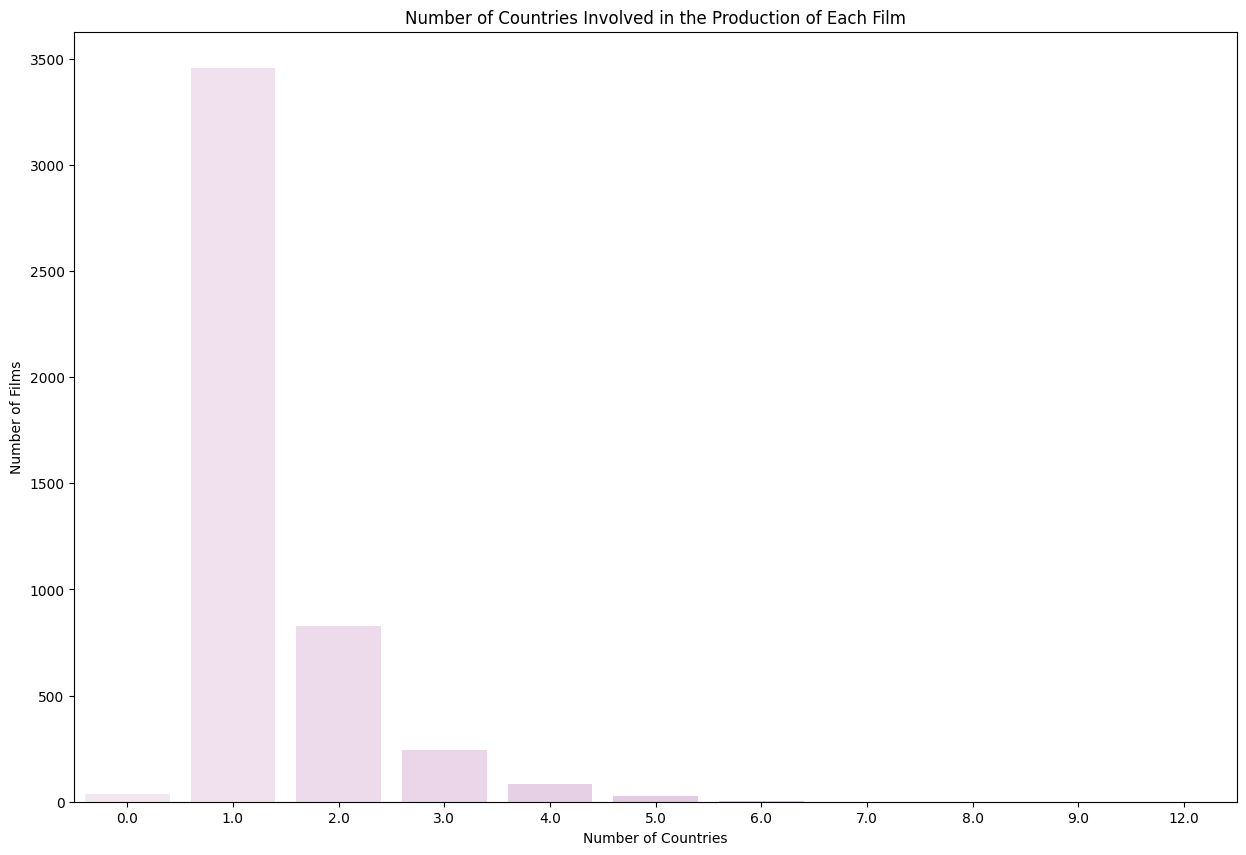

In [20]:
production_countries_counts = df['production_countries'].value_counts()

plt.figure(figsize=(15,10))
sns.barplot(x=production_countries_counts.index, y=production_countries_counts.values, palette=companies_colors)
plt.title('Number of Countries Involved in the Production of Each Film')
plt.xlabel('Number of Countries')
plt.ylabel('Number of Films')
plt.show()

# Release Date

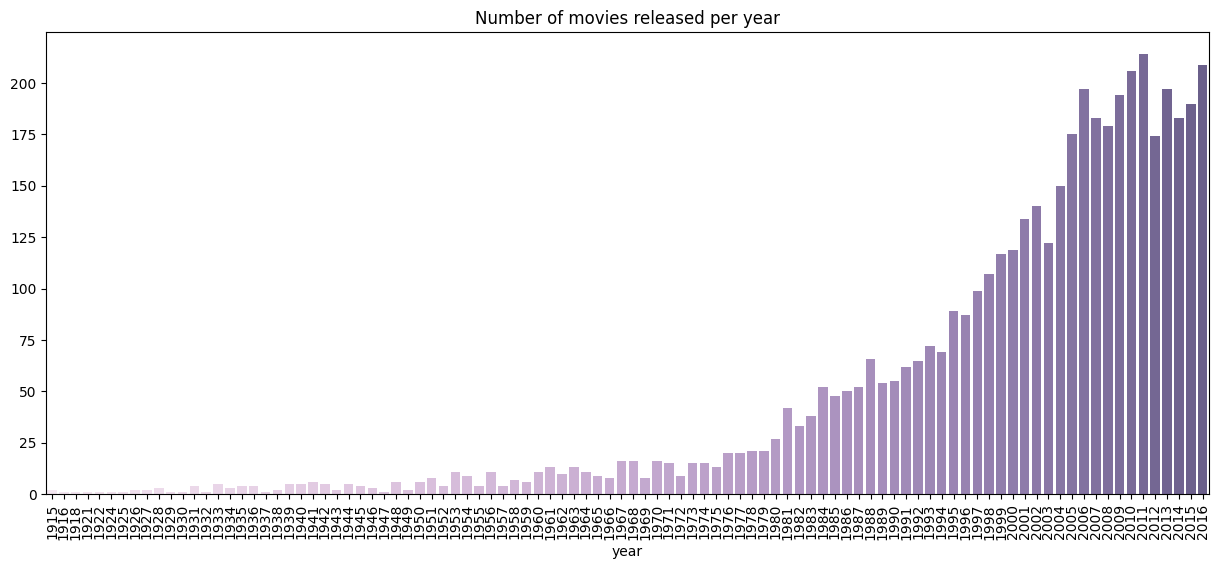

In [21]:
df = df.copy()

df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year
df['month'] = df['release_date'].dt.month
df['weekday'] = df['release_date'].dt.weekday

out_df['year'] = df['year']
out_df['month'] = df['month']
out_df['weekday'] = df['weekday']


plt.figure(figsize=(15,6))
yearly_counts = df['year'].value_counts()
years_colors = sns.cubehelix_palette(rot=.2, gamma=.5, n_colors=len(df['year'].unique()))
ax = sns.barplot(x=yearly_counts.index, y=yearly_counts.values, palette=years_colors)
plt.title('Number of movies released per year')
plt.xticks(rotation=90)

# for p in ax.patches:
#     ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

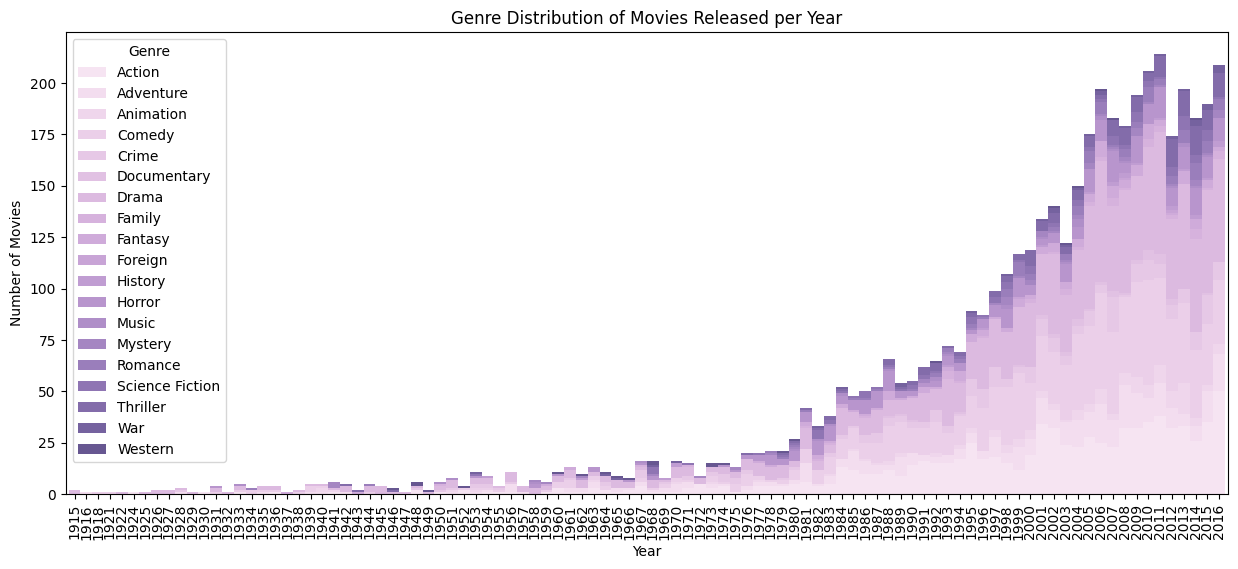

In [22]:
genre_distribution = df.groupby(['year'])['genres'].value_counts().unstack(fill_value=0)

sns.set_palette(genre_colors)
ax = genre_distribution.plot(kind='bar', figsize=(15, 6), stacked=True, width=1)
plt.title('Genre Distribution of Movies Released per Year')
plt.xticks(rotation=90)
ax.grid(False)


ax.set_xlabel('Year')
ax.set_ylabel('Number of Movies')
# plt.legend(title='Genre', loc='upper left', bbox_to_anchor=(1.05, 1), labels=genre_distribution.columns)
plt.legend(title='Genre', loc='upper left', labels=genre_distribution.columns)

plt.show()

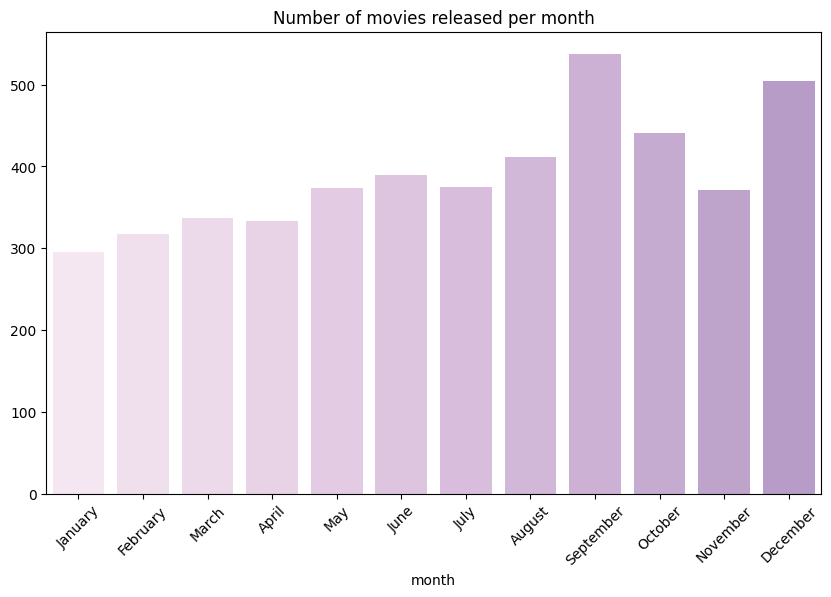

In [23]:
monthly_counts = df['month'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette=genre_colors)
plt.title('Number of movies released per month')
plt.xticks(ticks=range(0, 12),rotation=45, labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.show()

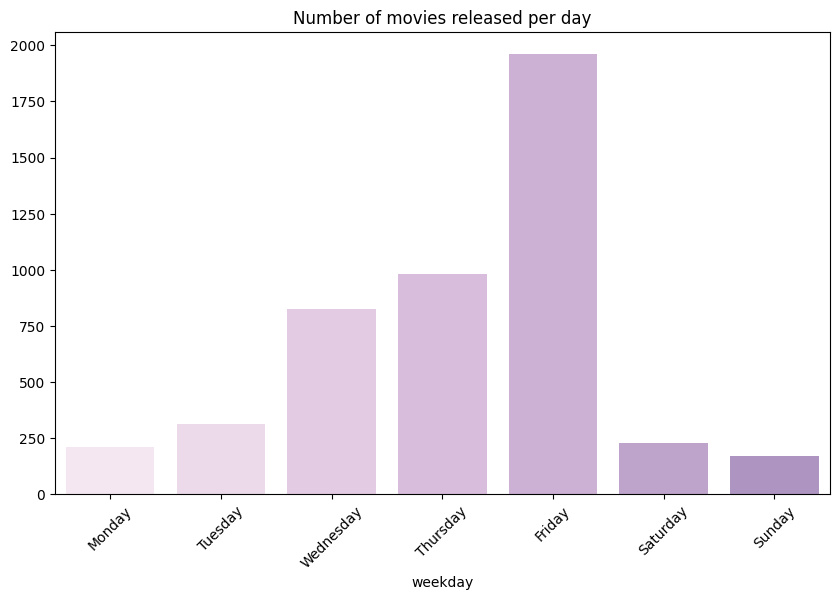

In [24]:
weekday_counts = df['weekday'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette=languages_colors)
plt.title('Number of movies released per day')
plt.xticks(ticks=[0,1,2,3,4,5,6],rotation=45, labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

# Revenue

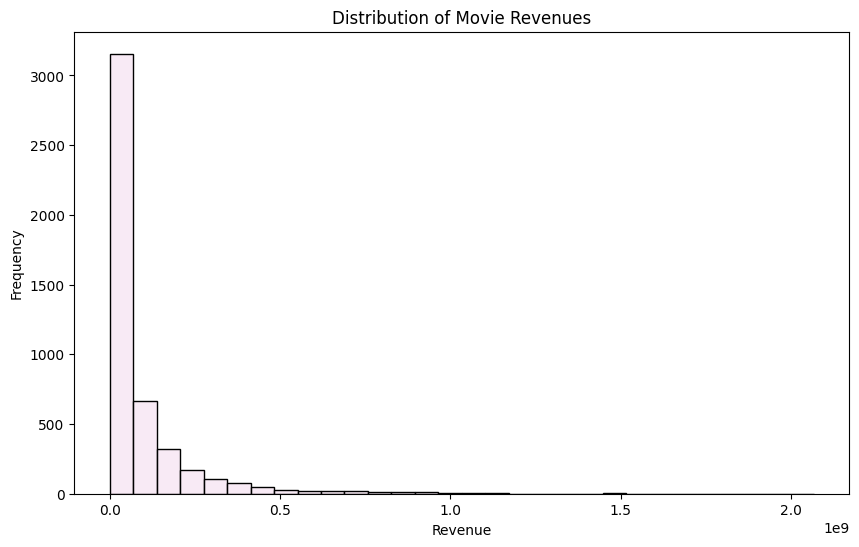

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(df['revenue'], kde=False, bins=30, color=first_color)
plt.title('Distribution of Movie Revenues')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

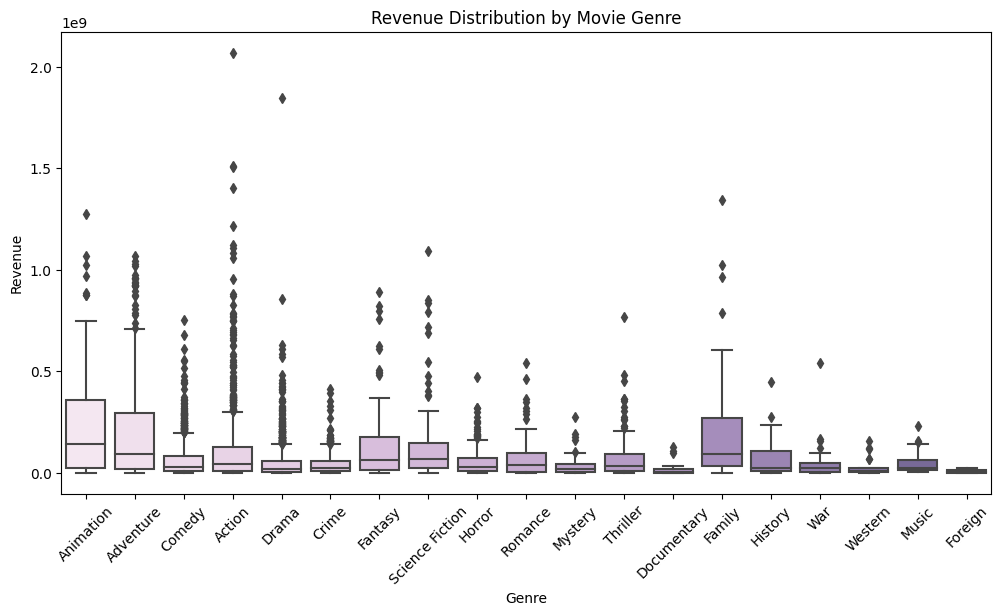

In [26]:
plt.figure(figsize=(12,6))

sns.boxplot(x='genres', y='revenue', data=df, palette=genre_colors)

plt.title('Revenue Distribution by Movie Genre')
plt.xlabel('Genre')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

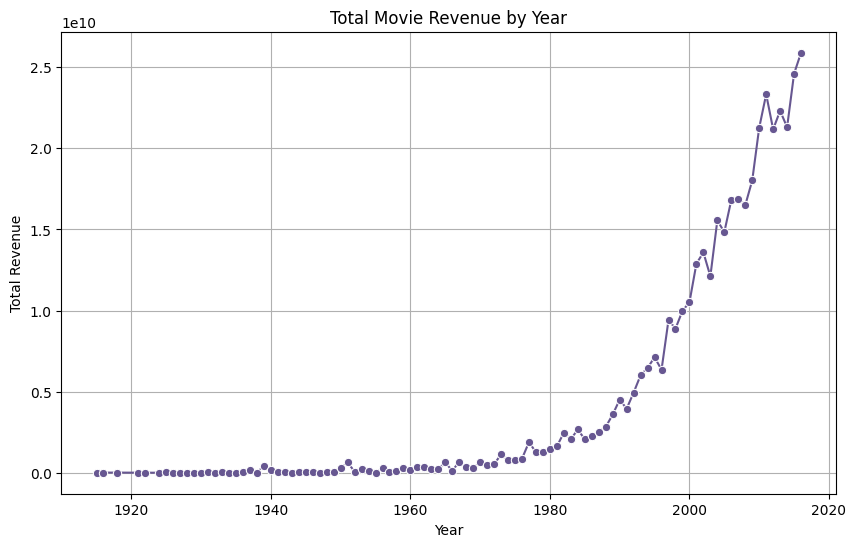

In [27]:
yearly_revenue = df.groupby('year')['revenue'].sum().reset_index()

plt.figure(figsize=(10,6))

sns.lineplot(data=yearly_revenue, x='year', y='revenue', marker='o', color=final_color)

plt.title('Total Movie Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

# Runtime

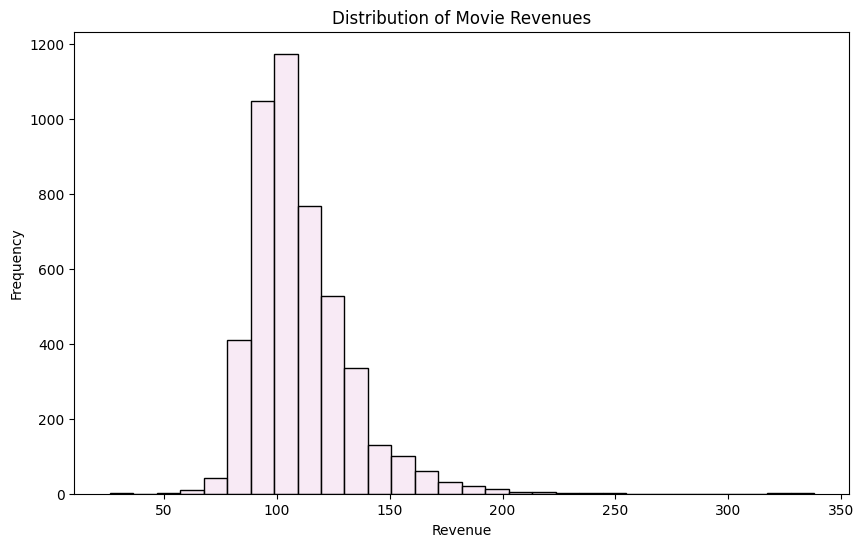

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(df['runtime'], kde=False, bins=30, color=first_color)
plt.title('Distribution of Movie Revenues')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

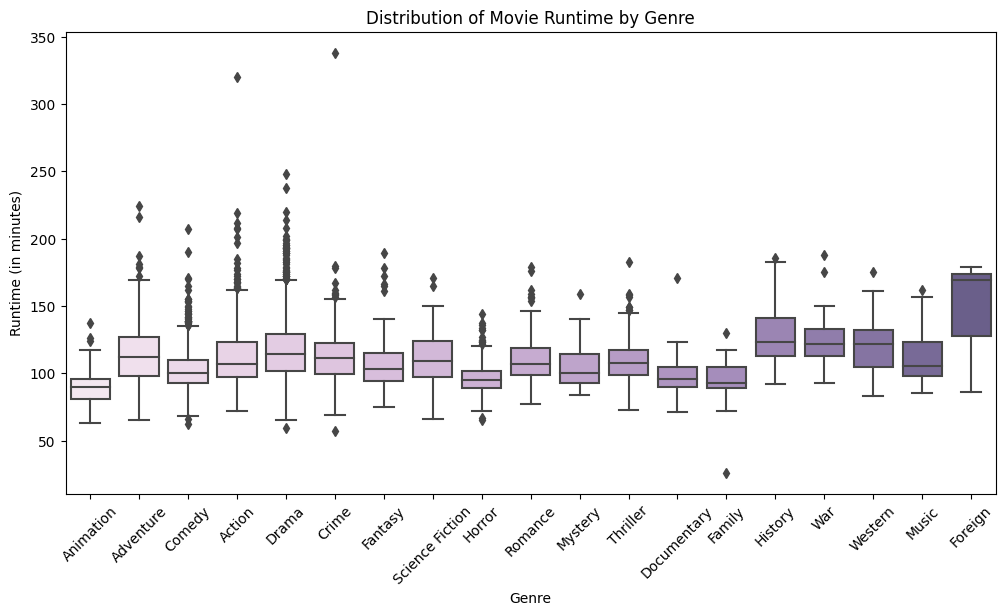

In [29]:
plt.figure(figsize=(12,6))

sns.boxplot(x='genres', y='runtime', data=df, palette=genre_colors)

plt.title('Distribution of Movie Runtime by Genre')
plt.xlabel('Genre')
plt.ylabel('Runtime (in minutes)')
plt.xticks(rotation=45)
plt.show()

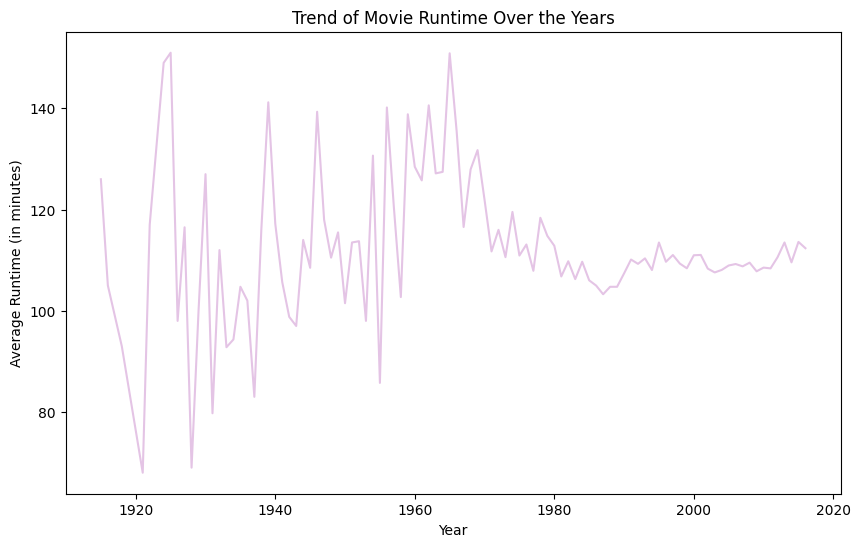

In [30]:
plt.figure(figsize=(10,6))

average_runtime_per_year = df.groupby('year')['runtime'].mean()

sns.lineplot(x=average_runtime_per_year.index, y=average_runtime_per_year.values, color=middle_color)

plt.title('Trend of Movie Runtime Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Runtime (in minutes)')
plt.show()

# Spoken Languages

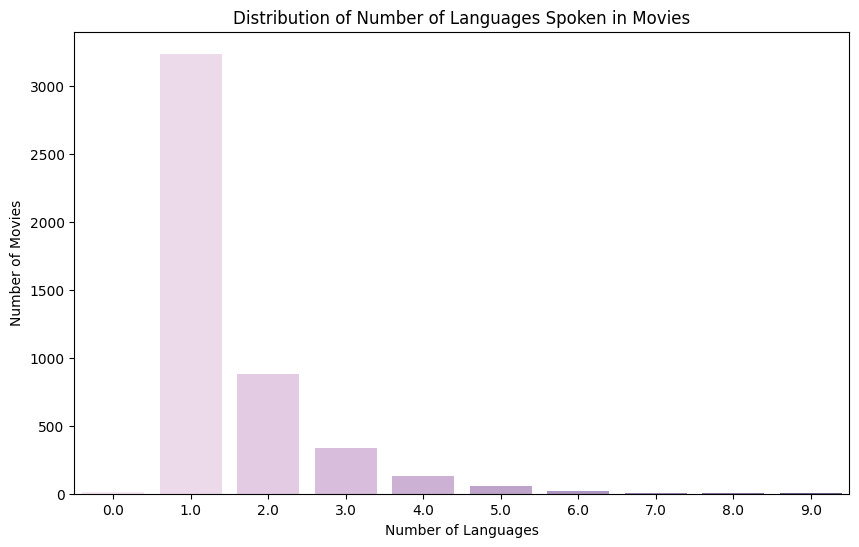

In [31]:
spoken_languages_counts = df['spoken_languages'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=spoken_languages_counts.index, y=spoken_languages_counts.values, palette=languages_colors)
plt.title('Distribution of Number of Languages Spoken in Movies')
plt.xlabel('Number of Languages')
plt.ylabel('Number of Movies')
plt.show()

# Votes

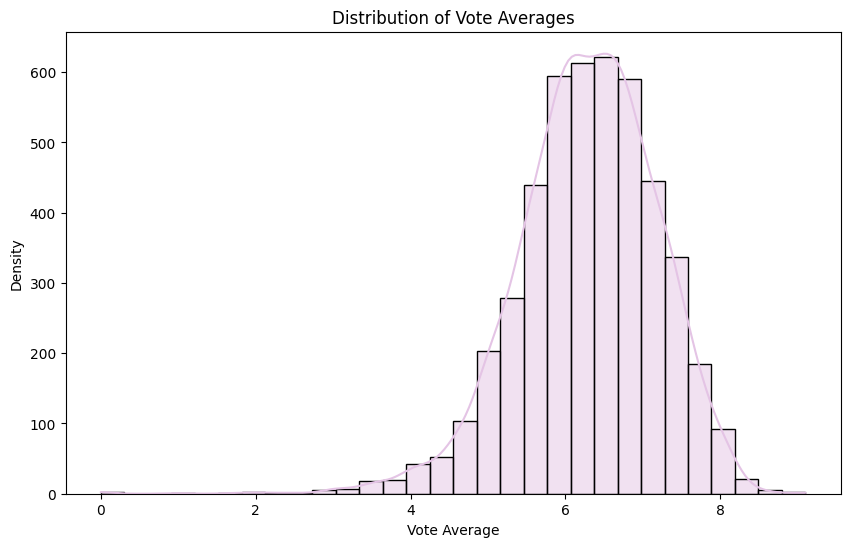

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(df['vote_average'],bins = 30, kde=True, color=middle_color)
plt.title('Distribution of Vote Averages')
plt.xlabel('Vote Average')
plt.ylabel('Density')
plt.show()

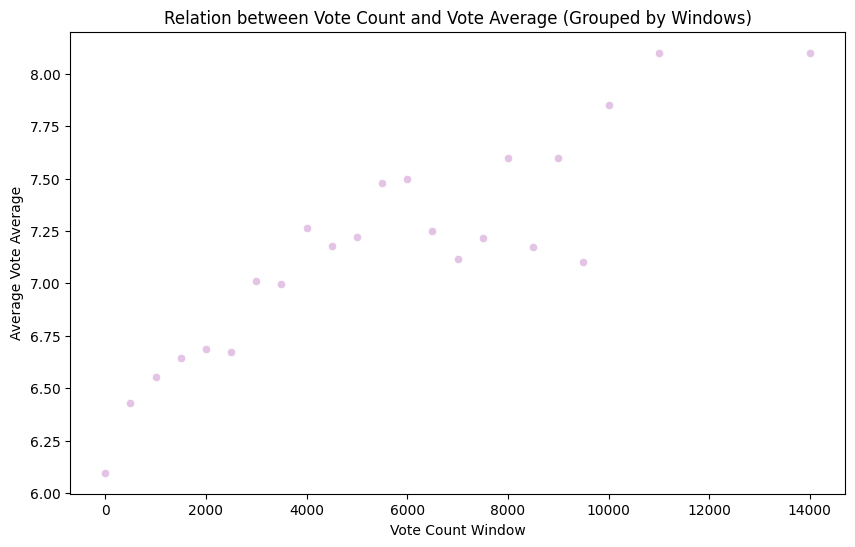

In [33]:
window_size = 500

df['Vote Count Window'] = df['vote_count'] // window_size * window_size
grouped_df = df.groupby('Vote Count Window').agg({'vote_count': 'count', 'vote_average': 'mean'}).reset_index()

grouped_df.columns = ['Vote Count Window', 'Number of Movies', 'Average Vote Average']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Vote Count Window', y='Average Vote Average', data=grouped_df, color=middle_color)
# sns.regplot(x='Vote Count Window', y='Average Vote Average', data=grouped_df, color=final_color, scatter=False)
plt.title('Relation between Vote Count and Vote Average (Grouped by Windows)')
plt.xlabel('Vote Count Window')
plt.ylabel('Average Vote Average')
plt.show()

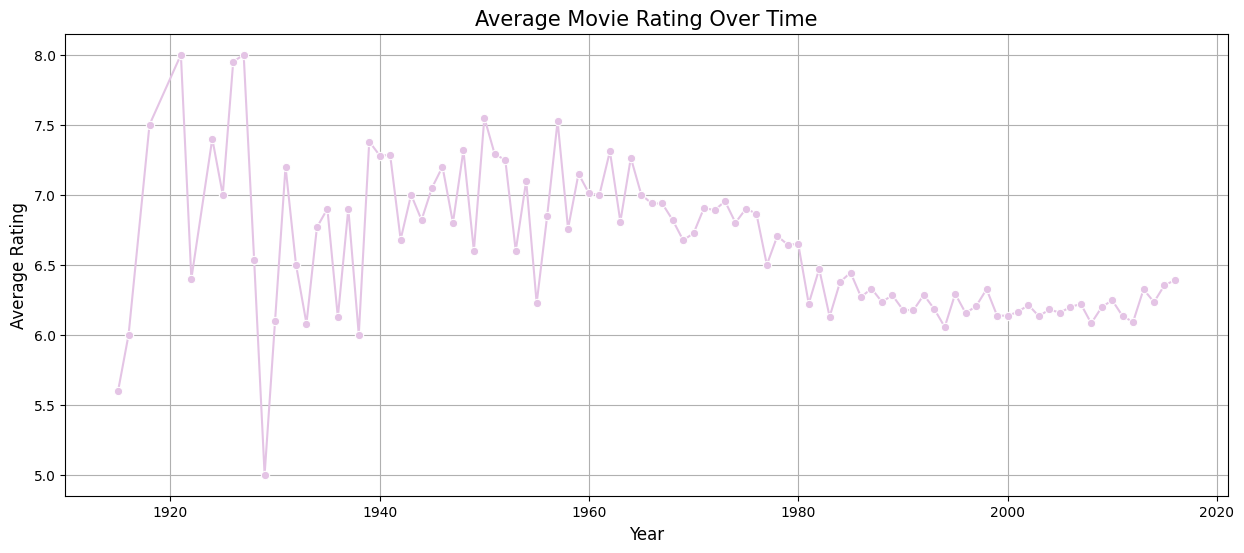

In [34]:
average_vote_per_year = df.groupby('year')['vote_average'].mean()

plt.figure(figsize=(15,6))
sns.lineplot(x=average_vote_per_year.index, y=average_vote_per_year.values, marker='o', color=middle_color)

plt.title('Average Movie Rating Over Time', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.grid(True)
plt.show()

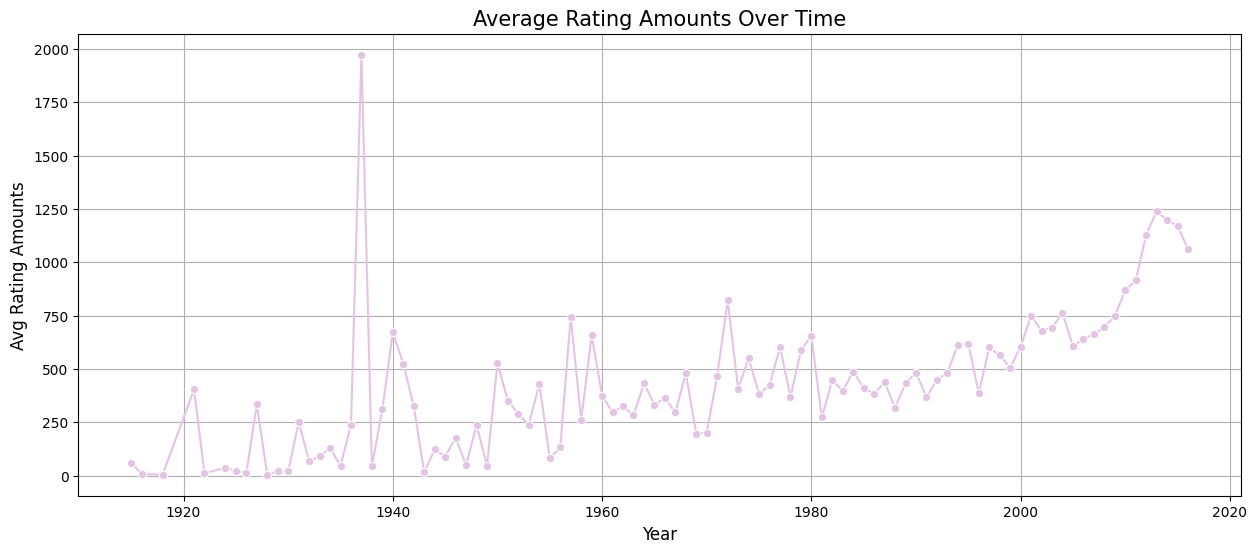

In [35]:
average_count_vote_per_year = df.groupby('year')['vote_count'].mean()

plt.figure(figsize=(15,6))
sns.lineplot(x=average_count_vote_per_year.index, y=average_count_vote_per_year.values, marker='o', color=middle_color)

plt.title('Average Rating Amounts Over Time', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Avg Rating Amounts', fontsize=12)
plt.grid(True)
plt.show()

# esta bien el pico en 1937, hay una sola peli con 1973 votos (blancanieves)

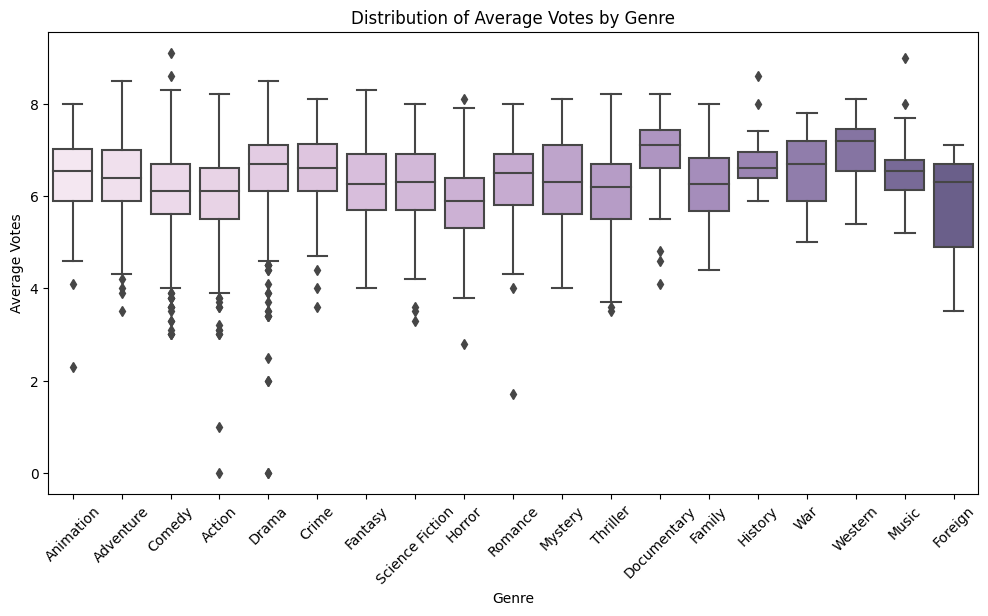

In [36]:
plt.figure(figsize=(12,6))

sns.boxplot(x='genres', y='vote_average', data=df, palette=genre_colors)

plt.title('Distribution of Average Votes by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Votes')
plt.xticks(rotation=45)
plt.show()

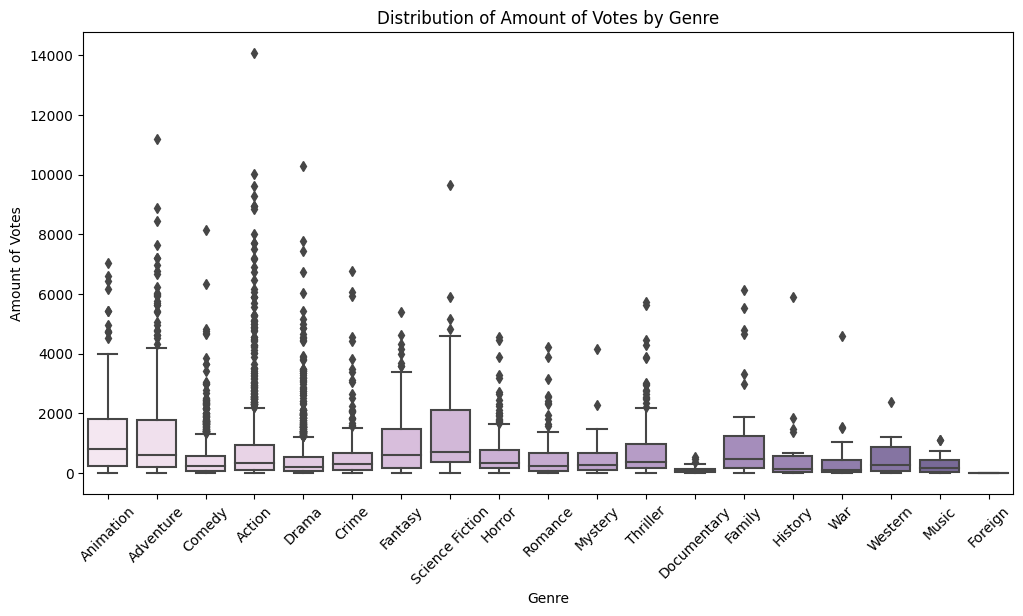

In [37]:
plt.figure(figsize=(12,6))

sns.boxplot(x='genres', y='vote_count', data=df, palette=genre_colors)

plt.title('Distribution of Amount of Votes by Genre')
plt.xlabel('Genre')
plt.ylabel('Amount of Votes')
plt.xticks(rotation=45)
plt.show()

In [38]:
out_df

budget     genres    imdb_id     original_title  \
0     30000000.0  Animation  tt0114709          Toy Story   
1     65000000.0  Adventure  tt0113497            Jumanji   
2     16000000.0     Comedy  tt0114885  Waiting to Exhale   
3     60000000.0     Action  tt0113277               Heat   
4     35000000.0     Action  tt0114576       Sudden Death   
...          ...        ...        ...                ...   
5234   2196531.0     Comedy  tt0453365           FC Venus   
5238  12000000.0     Action  tt0479751             சிவாஜி   
5239    800000.0     Comedy  tt0933361             Dikari   
5240   2000000.0    Romance  tt1718881         Про любоff   
5241   5000000.0     Action  tt1110037           Антидурь   

                                               overview  popularity  \
0     Led by Woody, Andy's toys live happily in his ...   21.946943   
1     When siblings Judy and Peter discover an encha...   17.015539   
2     Cheated on, mistreated and stepped on, the wom...    3.859495   
3     Obsessive master thief, Neil McCauley leads a ...   17.924927   
4     International action superstar Jean Claude Van...    5.231580   
...                                                 ...         ...   
5234  Pete is a football enthusiast, who plays as a ...    0.947509   
5238  Corrupt police and politicians target a comput...    1.323587   
5239  The sea, August, interesting and simple people...    0.903061   
5240  У девушки Даши, приехавшей с подругой «покорят...    0.121844   
5241  Failing to complete an important assignment wi...    0.039793   

      production_companies  production_countries release_date      revenue  \
0                      1.0                   1.0   1995-10-30  373554033.0   
1                      3.0                   1.0   1995-12-15  262797249.0   
2                      1.0                   1.0   1995-12-22   81452156.0   
3                      3.0                   1.0   1995-12-15  187436818.0   
4                      3.0                   1.0   1995-12-22   64350171.0   
...                    ...                   ...          ...          ...   
5234                   1.0                   1.0   2005-12-30    2411594.0   
5238                   1.0                   1.0   2007-06-14   19000000.0   
5239                   0.0                   0.0   2006-11-23    1328612.0   
5240                   1.0                   1.0   2010-09-30    1268793.0   
5241                   0.0                   1.0   2007-09-06    1413000.0   

      runtime  spoken_languages  vote_average  vote_count  overview_length  \
0        81.0               1.0           7.7      5415.0              303   
1       104.0               2.0           6.9      2413.0              395   
2       127.0               1.0           6.1        34.0              270   
3       170.0               2.0           7.7      1886.0              335   
4       106.0               1.0           5.5       174.0              448   
...       ...               ...           ...         ...              ...   
5234    107.0               1.0           5.6        10.0              669   
5238    185.0               2.0           6.9        25.0              117   
5239    100.0               1.0           5.8         6.0              378   
5240    107.0               1.0           4.0         3.0              534   
5241     91.0               1.0           1.0         1.0              256   

      sentiment  year  month  weekday  
0      0.112121  1995     10        0  
1     -0.218750  1995     12        4  
2      0.600000  1995     12        4  
3     -0.053571  1995     12        4  
4     -0.116667  1995     12        4  
...         ...   ...    ...      ...  
5234   0.102083  2005     12        4  
5238  -0.055556  2007      6        3  
5239   0.380000  2006     11        3  
5240   0.000000  2010      9        3  
5241   0.289286  2007      9        3  

[4685 rows x 19 columns]

In [39]:
genre2id = dict()
id2genre = dict()
i = 0
for genre in out_df['genres'].unique():
    genre2id[genre] = i
    id2genre[i] = genre
    i += 1
genre2id

{'Animation': 0,
 'Adventure': 1,
 'Comedy': 2,
 'Action': 3,
 'Drama': 4,
 'Crime': 5,
 'Fantasy': 6,
 'Science Fiction': 7,
 'Horror': 8,
 'Romance': 9,
 'Mystery': 10,
 'Thriller': 11,
 'Documentary': 12,
 'Family': 13,
 'History': 14,
 'War': 15,
 'Western': 16,
 'Music': 17,
 'Foreign': 18}

In [40]:
out_df['genre_id'] = out_df['genres'].apply(lambda x : genre2id[x])
out_df

budget     genres    imdb_id     original_title  \
0     30000000.0  Animation  tt0114709          Toy Story   
1     65000000.0  Adventure  tt0113497            Jumanji   
2     16000000.0     Comedy  tt0114885  Waiting to Exhale   
3     60000000.0     Action  tt0113277               Heat   
4     35000000.0     Action  tt0114576       Sudden Death   
...          ...        ...        ...                ...   
5234   2196531.0     Comedy  tt0453365           FC Venus   
5238  12000000.0     Action  tt0479751             சிவாஜி   
5239    800000.0     Comedy  tt0933361             Dikari   
5240   2000000.0    Romance  tt1718881         Про любоff   
5241   5000000.0     Action  tt1110037           Антидурь   

                                               overview  popularity  \
0     Led by Woody, Andy's toys live happily in his ...   21.946943   
1     When siblings Judy and Peter discover an encha...   17.015539   
2     Cheated on, mistreated and stepped on, the wom...    3.859495   
3     Obsessive master thief, Neil McCauley leads a ...   17.924927   
4     International action superstar Jean Claude Van...    5.231580   
...                                                 ...         ...   
5234  Pete is a football enthusiast, who plays as a ...    0.947509   
5238  Corrupt police and politicians target a comput...    1.323587   
5239  The sea, August, interesting and simple people...    0.903061   
5240  У девушки Даши, приехавшей с подругой «покорят...    0.121844   
5241  Failing to complete an important assignment wi...    0.039793   

      production_companies  production_countries release_date      revenue  \
0                      1.0                   1.0   1995-10-30  373554033.0   
1                      3.0                   1.0   1995-12-15  262797249.0   
2                      1.0                   1.0   1995-12-22   81452156.0   
3                      3.0                   1.0   1995-12-15  187436818.0   
4                      3.0                   1.0   1995-12-22   64350171.0   
...                    ...                   ...          ...          ...   
5234                   1.0                   1.0   2005-12-30    2411594.0   
5238                   1.0                   1.0   2007-06-14   19000000.0   
5239                   0.0                   0.0   2006-11-23    1328612.0   
5240                   1.0                   1.0   2010-09-30    1268793.0   
5241                   0.0                   1.0   2007-09-06    1413000.0   

      runtime  spoken_languages  vote_average  vote_count  overview_length  \
0        81.0               1.0           7.7      5415.0              303   
1       104.0               2.0           6.9      2413.0              395   
2       127.0               1.0           6.1        34.0              270   
3       170.0               2.0           7.7      1886.0              335   
4       106.0               1.0           5.5       174.0              448   
...       ...               ...           ...         ...              ...   
5234    107.0               1.0           5.6        10.0              669   
5238    185.0               2.0           6.9        25.0              117   
5239    100.0               1.0           5.8         6.0              378   
5240    107.0               1.0           4.0         3.0              534   
5241     91.0               1.0           1.0         1.0              256   

      sentiment  year  month  weekday  genre_id  
0      0.112121  1995     10        0         0  
1     -0.218750  1995     12        4         1  
2      0.600000  1995     12        4         2  
3     -0.053571  1995     12        4         3  
4     -0.116667  1995     12        4         3  
...         ...   ...    ...      ...       ...  
5234   0.102083  2005     12        4         2  
5238  -0.055556  2007      6        3         3  
5239   0.380000  2006     11        3         2  
5240   0.000000  2010      9        3         9  


In [41]:
out_df.to_csv("./data/processed_movie_data.csv", sep=";", encoding="utf-8", index=False)